# Исследование данных о фильмах

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Открытие файлов и знакомство с ними

У нас имеются следующие данные в двух датасетах:  
•	title — название фильма;  
•	puNumber — номер прокатного удостоверения;  
•	show_start_date — дата премьеры фильма;  
•	type — тип фильма;  
•	film_studio — студия-производитель;  
•	production_country — страна-производитель;  
•	director — режиссёр;  
•	producer — продюсер;  
•	age_restriction — возрастная категория;  
•	refundable_support — объём возвратных средств государственной поддержки;  
•	nonrefundable_support — объём невозвратных средств государственной поддержки;  
•	financing_source — источник государственного финансирования;  
•	budget — общий бюджет фильма;  
•	ratings — рейтинг фильма на КиноПоиске;  
•	genres — жанр фильма.  
•	box_office — сборы в рублях.  

    Задача: объединить датасеты в один, ознакомившись с их содержимым наметить вектор дальнейшей работы.

In [102]:
try: 
    a = pd.read_csv('/datasets/mkrf_movies.csv')
    b = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    a = pd.read_csv('datasets/mkrf_movies.csv')
    b = pd.read_csv('datasets/mkrf_shows.csv')   
pd.set_option('display.max_columns', None)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [103]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Итак, попробуем объединить два датафрейма в один для удобства дальнейшей работы. Как видно из общей информации, сначала стоит привести puNumber к одному типу, а потому уже склеить по нему. 

In [104]:
b['puNumber'] = b['puNumber'].astype(str)
df = a.merge(b, on='puNumber', how='left')

In [105]:
#приведём названия колонок к нижнему регистру
df.columns= df.columns.str.lower()

In [106]:
df.head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [107]:
len(a) == len(df)

True

In [108]:
len(b) == df.box_office.value_counts().sum()

True

Первая проверка на одинаковую длину фреймов. Если это так, то мы не посоздавали дубликатов, а корректно внесли значения в уже имеющуюся таблицу.   
    

Вторая проверка на соотношение длин второго фрейма и заполненных значений итогового. Всё верно — ни один фильм не упущен.  
    
Ниже идут две визуальные проверки: сначала фильмы из фрейма b выводятся как есть, дальше в таком же виде сортируется итоговый фрейм и выводятся нужные колонки. Кажется, всё приклеилось правильно =)

In [120]:
b.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [124]:
df[df['box_office'].notna()].sort_values(by='punumber').head()[['punumber', 'box_office']]

,punumber,box_office
1128,111000113,2.450000e+03
2397,111000115,6.104000e+04
3136,111000116,1.530300e+08
3670,111000117,1.226096e+07
5693,111000118,1.636841e+08


##  Предобработка данных

### Замена типов данных

In [8]:
df['punumber'] = pd.to_numeric(df['punumber'], errors='coerce')

In [9]:
df[pd.isnull(df['punumber'])]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проигнорировав ошибку (заменив её NaN) при изменении формата, мы потеряли всего одно значение. К тому же, в этой строке нет 
и многих других данных. Удалим её, а потом приведём форма времени к удобному для работы:

In [10]:
df.drop(labels=list(df[df['punumber'].isna()].index), inplace=True)
df.reset_index()
df['punumber'] = df['punumber'].astype(int);

In [11]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')
df['ratings'].value_counts().sum()

6519

In [12]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['ratings'].value_counts().sum()

6490

При переводе рейтинга в числовой формат потеряны 29 значений. Это вполне можно игнорировать. 

In [13]:
df.dtypes

title                            object
punumber                          int32
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

Типы данных приведены к нужным форматам, все оставшиеся object столбцы - категориальные.

### Добавление новых столбцов

In [14]:
#добавляем столбец с процентной долей господдержки от общего бюджета
df['support_percent'] = round((df['refundable_support'] + df['nonrefundable_support'])/df['budget']  * 100)
#df[df['support_percent'].isna() == False]

In [15]:
#добавляем столбец с годом выпуска
df['year'] = df['show_start_date'].dt.year

In [16]:
#данные о жанрах переводятся в формат списка для последующего обращения по индексу
df['genres'] = df['genres'].str.split(',')

In [17]:
#функция возвращает первый жанр из списка, при ошибках выдаёт 0
def genre_typer(row):
    try:
        a = row['genres'][0]
        return a
    except:
        return 0

In [18]:
#применяем функцию
df['main_genre'] = df.apply(genre_typer, axis=1)

In [19]:
#работает как часы
df[['genres', 'main_genre']]

,genres,main_genre
0,"[боевик, драма, мелодрама]",боевик
1,"[драма, военный]",драма
2,"[фантастика, боевик, триллер]",фантастика
3,"[фантастика, боевик, триллер]",фантастика
4,"[фантастика, боевик, триллер]",фантастика
...,...,...
7481,NaN,0
7482,"[боевик, триллер]",боевик
7483,NaN,0
7484,NaN,0


### Проверка дубликатов

In [20]:
#проверка данных на дубликаты
df[df['title'].duplicated(keep=False)==True].head()

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,year,main_genre
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"[фантастика, боевик, триллер]",NaN,NaN,2016,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"[фантастика, боевик, триллер]",NaN,NaN,2016,фантастика
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"[фантастика, боевик, триллер]",NaN,NaN,2015,фантастика
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"[драма, спорт]",NaN,NaN,2015,драма
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"[боевик, драма, криминал]",NaN,NaN,2015,боевик


Очевидно, что фильмы попадают в список неоднократно при получении нескольких прокатных удостоверений. Это вполне 
может произойти при прокате в кинотеатре одной компанией, последующей демонстрации фильма в эфире телеканала, с дальнейшим переходом прав на показ ещё одному каналу.  
Стоит выбрать только самые ранние даты, совпадающие с премьерными показами, тем более, что кроме даты и номера прокатного удостоверения ничего не меняется: очевидно, что сохраняется как режиссёр и страна производства вместе с жанром, так и первично выданные возрастные категории и рейтинг кинокритиков. 

In [21]:
#отсортируем все фильмы по дате выпуска и будем удалять любые дубликаты после первого
drop = df.sort_values(by='show_start_date').drop_duplicates(subset='title', keep='first')
drop = drop.sort_index().reset_index().drop(columns='index')
drop

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,year,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"[боевик, драма, мелодрама]",NaN,NaN,2015,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"[драма, военный]",NaN,NaN,2016,драма
2,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"[фантастика, боевик, триллер]",NaN,NaN,2015,фантастика
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,[драма],NaN,NaN,2016,драма
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"[мелодрама, комедия]",2700.0,NaN,2013,мелодрама
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0
6767,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"[боевик, триллер]",NaN,NaN,2019,боевик
6768,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0
6769,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0


In [145]:
len(df) - len(drop)

741

In [146]:
drop.punumber.value_counts()

221054410    2
221048915    1
114000211    1
111002411    1
111002211    1
            ..
121011715    1
114000715    1
111007815    1
111004515    1
124010719    1
Name: punumber, Length: 6744, dtype: int64

In [147]:
drop[drop['punumber'] == 221054410]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,year,main_genre,production_country_list
4445,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"[комедия, криминал]",NaN,NaN,2010,комедия,"[США, Австралия]"
4446,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"[комедия, криминал]",NaN,NaN,2010,комедия,[США]


Начну с конца: естественно, у нас есть неполные дубликаты. Выше я уже обращал внимание на оные в колонке с названиями фильмов, думая, как это могло получиться. Разумеется, неуники также есть практически во всех остальных колонках.
    
Потеряна 741 строка. Это около 10% данных, что довольно много, впрочем, всё это мы приравняли к полным дубликатам, так что за потери можно не считать =)
    
Также вручную найден странный дубль в номере прокатного удостоверения. Это один и тот же фильм, там видны проблемы в записи режиссёра и продюссера, почему-то разные категории и страны с рейтингом. Не очень понятно, какой из вариантов предпочтительнее, к тому же, он всего один такой, посему точечно аннигилировать его по индексу не будем, оставив всё как есть    

### Заполнение пропусков

In [22]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6771 entries, 0 to 6770
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6771 non-null   object        
 1   punumber               6771 non-null   int32         
 2   show_start_date        6771 non-null   datetime64[ns]
 3   type                   6771 non-null   object        
 4   film_studio            6754 non-null   object        
 5   production_country     6769 non-null   object        
 6   director               6762 non-null   object        
 7   producer               6212 non-null   object        
 8   age_restriction        6771 non-null   object        
 9   refundable_support     329 non-null    float64       
 10  nonrefundable_support  329 non-null    float64       
 11  budget                 329 non-null    float64       
 12  financing_source       329 non-null    object        
 13  rat

По большому счёту, мы не можем адекватно обработать пропуски в этих данных.  
Наша таблица теперь состоит из 6771 уникальных строк.  
Можно безболезненно дропнуть строки с пропусками в production_country и director, а также film_studio.

Мы потеряем очень мало значений.

In [23]:
drop = drop.dropna(subset=['production_country', 'director', 'film_studio']).reset_index().drop(columns='index')

In [24]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6745 non-null   object        
 1   punumber               6745 non-null   int32         
 2   show_start_date        6745 non-null   datetime64[ns]
 3   type                   6745 non-null   object        
 4   film_studio            6745 non-null   object        
 5   production_country     6745 non-null   object        
 6   director               6745 non-null   object        
 7   producer               6190 non-null   object        
 8   age_restriction        6745 non-null   object        
 9   refundable_support     329 non-null    float64       
 10  nonrefundable_support  329 non-null    float64       
 11  budget                 329 non-null    float64       
 12  financing_source       329 non-null    object        
 13  rat

In [25]:
#количество уникальных фильмов равняется длине фрейма, следовательно, каждый фильм встречается лишь 1 раз
drop['title'].value_counts().count() == len(drop['title'])

True

Собственно, данные о господдержке у нас из исходного фрейма, там мы дополнять и менять ничего не будем априорно.
    
Выискивать информацию о сборах — не самое простое и необходимое занятие, а применить хоть какие-то методики для рассчёта мы здесь не можем. 
    
Около пятисот нанов в продюссерском составе можно тоже оставить как есть, они нам не критичны.

В итоге, это как минимум сложно заполнить, ведь нет никакой взаимосвязи между соседними строками. Здесь вряд ли хорошо покажут себя даже импутеры склеарна и КНН.

### Изучение категориальных значений

In [26]:
drop.head(7)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,year,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"[боевик, драма, мелодрама]",NaN,NaN,2015,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"[драма, военный]",NaN,NaN,2016,драма
2,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"[фантастика, боевик, триллер]",NaN,NaN,2015,фантастика
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,[драма],NaN,NaN,2016,драма
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"[мелодрама, комедия]",2700.0,NaN,2013,мелодрама
5,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"[мюзикл, мелодрама, комедия]",NaN,NaN,2014,мюзикл
6,Отпетые мошенники.,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"[комедия, криминал]",NaN,NaN,2016,комедия


#### Типы

In [27]:
drop['type'].value_counts()

Художественный                3923
 Художественный               1345
Анимационный                   766
Прочие                         385
Документальный                 275
Научно-популярный               49
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [28]:
drop['type'] = drop['type'].str.replace(' ', '')
drop['type'] = drop['type'].str.replace('Музыкально-развлекательный', 'Прочие')

In [29]:
drop['type'].value_counts()

Художественный       5268
Анимационный          767
Прочие                386
Документальный        275
Научно-популярный      49
Name: type, dtype: int64

Жанры приведены к общему формату (убраны пробелы в начале). Единственный фильм в музыкальном жанре записан в раздел "Прочие" 
во избежание излишней дробности категорий.

#### Страны

In [30]:
len(drop['production_country'])

6745

In [31]:
drop['production_country'].value_counts()

Россия                                                                 1775
США                                                                    1774
СССР                                                                    345
Франция                                                                 278
Великобритания                                                          236
                                                                       ... 
Великобритания - Германия - США                                           1
Россия-Ирландия                                                           1
Македония - Франция - Великобритания                                      1
Франция - Бразилия - Италия                                               1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: production_country, Length: 943, dtype: int64

In [32]:
drop['production_country_list'] = drop['production_country'].str.split('[-,]')

In [33]:
def x(a):
    for i in range(len(a)):
        a[i] = a[i].lstrip().rstrip()
    return a

In [34]:
drop['production_country_list'] = drop['production_country_list'].apply(x)

In [35]:
drop['production_country_list'].iloc[6731]

['Дания', 'Канада', 'Швеция', 'Франция', 'Германия', 'Великобритания', 'США']

Функция выше создаёт список из стран, разбитый в виде списка. Теперь можно точно считать страны или фильмы, снятые более чем одной страной. 

#### Возраст

In [37]:
drop['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2510
«12+» - для детей старше 12 лет           1471
«18+» - запрещено для детей               1423
«0+» - для любой зрительской аудитории     741
«6+» - для детей старше 6 лет              600
Name: age_restriction, dtype: int64

Здесь всё в порядке, можно попробовать сократить содержимое строки до лаконичного вида, оставив только число, либо вообще заменить на новую категорию. Впрочем, это необязательно.

#### Студия

In [38]:
drop['film_studio'].value_counts().head(15)

Киностудия "Мосфильм"                                           339
ООО "Мульт в кино"                                               57
Анимаккорд Лтд                                                   23
ООО "Мульт в кино"                                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           15
ООО "ТаББаК"                                                     15
Опус Арте                                                        14
Р А И Синема                                                     14
ООО "Студия анимационного кино "Мельница"                        14
ООО "Кинокомпания "СТВ"                                          13
ЗАО "Аэроплан"                                                   12
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     12
Уолт Дисней Пикчерз                                              11
Свердловская киностудия                                          10
ОАО "ТПО "Санкт-Петербургская студия документаль

Сложно придумать, что можно сделать с этими данными вообще. Был бы рад какому-нибудь совету.
    
Сейчас всё выглядит так, будто есть некоторые неочевидные повторы в студиях и их комбинациях, которые сложно обработать базовыми знаниями стемминга и лемматизации без ухода в tfidf и нлп в целом. Студии заполнены кириллицей, не имеют пропусков, что мы уже знаем из подсчёта значений, а больше особо и не расписать ничего.

#### Режиссёр

In [39]:
drop['director'].value_counts().head(4)

О.Семёнова     47
Д.Червяцов     16
Вуди Аллен     13
О.Семёнова     12
Name: director, dtype: int64

In [40]:
drop['director'] = drop['director'].str.strip()

Были удалены пробелы в началах и концах ячеек, с помощью чего мы получили истенное значение фильмов, в которых режиссёром выступила О. Семёнова. Вероятно, кроме неё встречались ещё режиссёры с подобными проблемами.

In [41]:
drop['director'].value_counts().head(4)

О.Семёнова          60
Д.Червяцов          16
Вуди Аллен          13
Стивен Содерберг    12
Name: director, dtype: int64

### Изучение количественных значений

In [42]:
drop[drop['budget'].notna()]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,year,main_genre,production_country_list
1060,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"[драма, мелодрама]",3.653536e+05,33.0,2013,драма,[Россия]
1210,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,70.0,2014,0,[Россия]
1255,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"[комедия, фантастика]",1.995703e+07,61.0,2013,комедия,[Россия]
1278,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,[драма],5.591750e+04,69.0,2014,драма,[Россия]
1522,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,[драма],2.321000e+05,62.0,2014,драма,[Россия]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,[комедия],3.073569e+09,38.0,2019,комедия,[Россия]
6724,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"[история, биография, драма]",7.177032e+08,51.0,2019,история,[Россия]
6726,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"[мультфильм, приключения, семейный]",5.010692e+08,53.0,2019,мультфильм,[Россия]
6735,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,[драма],NaN,65.0,2019,драма,[Россия]


In [165]:
descr = drop[drop['budget'].notna()].describe()
descr = descr.drop('support_percent', axis=1)
descr

,punumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year
count,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,311.000000,3.160000e+02,329.000000
mean,1.115991e+08,1.165350e+07,4.805984e+07,1.251467e+08,5.998071,1.332534e+08,2016.699088
std,5.728784e+06,2.454003e+07,5.701189e+07,1.839162e+08,1.123903,3.357391e+08,1.633500
min,1.110001e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.550000e+03,2013.000000
25%,1.110048e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.300000,1.227870e+06,2015.000000
50%,1.110103e+08,0.000000e+00,3.000000e+07,6.849061e+07,6.200000,1.639050e+07,2016.000000
75%,1.110174e+08,1.500000e+07,4.000000e+07,1.400250e+08,6.700000,1.069345e+08,2018.000000
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,8.500000,3.073569e+09,2019.000000


In [201]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
test = drop[drop['budget'].notna()][['refundable_support','nonrefundable_support','budget','box_office']]
test_sc = sc.fit_transform(test)
test_sc = pd.DataFrame(test_sc, index=test.index, columns=test.columns)
test_sc.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,329.000000,329.00000,329.000000,316.000000
mean,0.064742,0.12015,0.054292,0.043354
std,0.136334,0.14253,0.079788,0.109234
min,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.06250,0.018221,0.000399
50%,0.000000,0.07500,0.029713,0.005332
75%,0.083333,0.10000,0.060746,0.034791
max,1.000000,1.00000,1.000000,1.000000


В общем, получилось забавно.  
Думаю, что наглядности не прибавилось, но в рамках оценки истинных разбросов значений оставим.  
Очень интересен столбец с бокс оффисом и его процентили. Надо бы посмотреть, как там дела с количеством фильмов, кажется, несколько аутлаеров влияют на картину (впрочем, и другие характеристики тоже находятся под этим влиянием).  
Здесь нам важна только вертикальная ось, по которой откладываются суммы в миллионах рублей. Подавляющее большинство точек сосредоточено ниже 500 млн. Как-то так =)

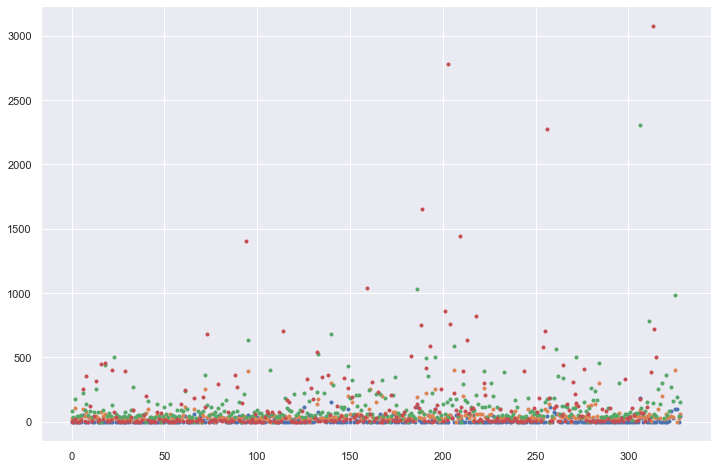

In [258]:
def plotter(column):
    plot = drop[drop['budget'].notna()][column]/1_000_000
    plot = plot.dropna()
    plot = plot.reset_index(drop=True)
    return plot.plot(style='.')
for i in test_sc.describe().columns:
    plotter(i)

## Исследовательский анализ

* Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [43]:
drop['year'].isna().sum()

0

У нас есть данные о старте проката для абсолютно каждого фильма. Эта картина наблюдалась ещё в оригинальном фрейме, до любых изменений. Построим график и проследим динамику:

In [44]:
sns.set(rc = {'figure.figsize':(12,8)})

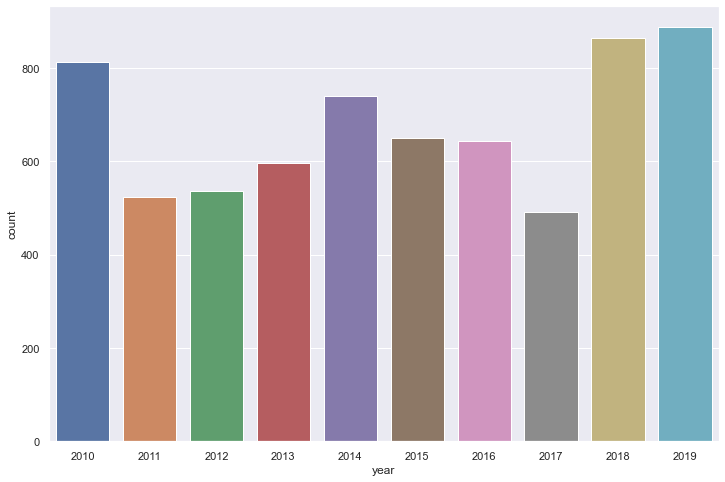

In [45]:
sns.countplot(data=drop, x='year');

In [322]:
box = len(drop[drop['box_office'].notna()])
total = len(drop[drop['box_office'].isna()])
values = [box, total]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

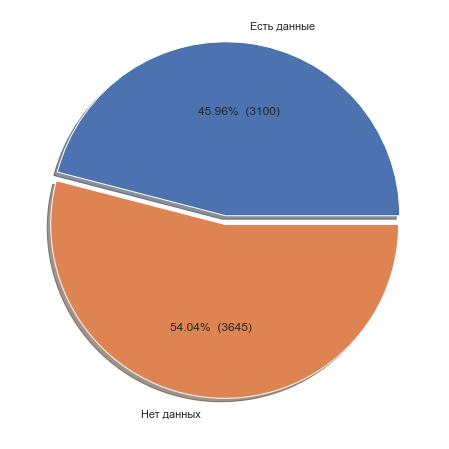

In [323]:
plt.pie([box, total], labels = ['Есть данные', 'Нет данных'], explode = [0.05, 0],
       shadow = True, autopct=make_autopct(values));

In [265]:
drop['show_start_date'].notna().value_counts()

True    6745
Name: show_start_date, dtype: int64

*	Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [46]:
a = drop.groupby('year', as_index=False).sum() #сгруппируем по году, просуммировав значения остальных колонок
a['box_office_mln'] = round(a['box_office']/1_000_000, 1) #введём колонку со сборами в миллионах
a[['year', 'box_office_mln']] #вывод таблицы из года и суммарных сборов

,year,box_office_mln
0,2010,2.4
1,2011,14.1
2,2012,6.9
3,2013,29.8
4,2014,7444.9
5,2015,39497.3
6,2016,47857.0
7,2017,48559.0
8,2018,49653.6
9,2019,48409.4


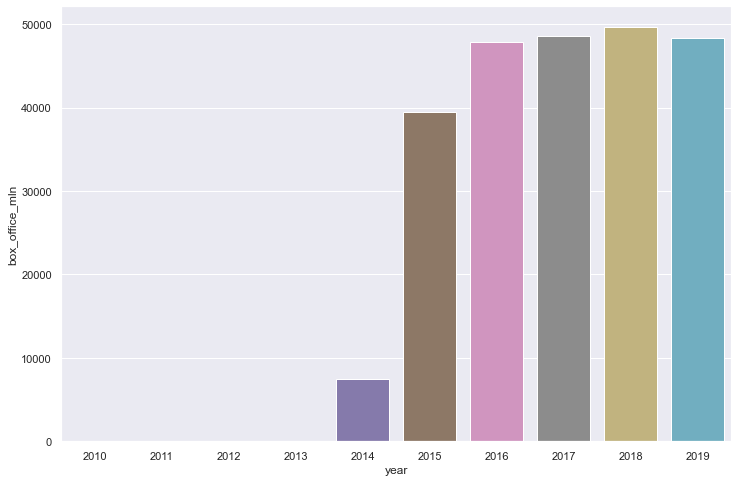

In [47]:
sns.barplot(data=a, x='year', y='box_office_mln');

Из таблицы и столбчатой диаграммы выше видно, что максимальным по сборам был 2018 год - более 49 миллиардов рублей.  
Минимальным оказался 2010 год - всего около 2.4 млн рублей.  К сожалению, мы обрабатываем лишь 3100 фильмов, данные о которых у нас имеются. Больше половины фрейма остаётся за кадром.

*	С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [48]:
print('Процент отсутствующих данных о сборах за:')
for i in range(2010, 2020):
    print(f'{i} год: ',
        round(drop[drop['year'] == i]['box_office'].isna().sum()/len(drop[drop['year'] == i])*100), '%', sep='')

Процент отсутствующих данных о сборах за:
2010 год: 88%
2011 год: 80%
2012 год: 77%
2013 год: 69%
2014 год: 63%
2015 год: 29%
2016 год: 22%
2017 год: 28%
2018 год: 45%
2019 год: 41%


До 2015 года процент имеющихся данных довольно мал, узнаем, как соотносятся абсолютные значения количества фильмов по годам:

In [49]:
drop['year'].value_counts().sort_index()

2010    813
2011    523
2012    537
2013    597
2014    739
2015    649
2016    644
2017    492
2018    864
2019    887
Name: year, dtype: int64

Значения соразмерны, попробуем посчитать средние и медианные сборы фильмов.

In [50]:
mean = drop.groupby('year', as_index=True).mean() 
mean

,punumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percent
year,,,,,,,
2010,1.678459e+08,NaN,NaN,NaN,6.698118,2.427104e+04,NaN
2011,1.369482e+08,NaN,NaN,NaN,6.470650,1.325487e+05,NaN
2012,1.257827e+08,NaN,NaN,NaN,6.517347,5.484820e+04,NaN
2013,1.219721e+08,0.000000e+00,6.717397e+07,1.277177e+08,6.494364,1.619549e+05,47.0
2014,1.244603e+08,4.437500e+06,3.131264e+07,7.996780e+07,6.545765,2.707254e+07,NaN
2015,1.256811e+08,7.408757e+06,3.510568e+07,8.499615e+07,6.273166,8.586370e+07,NaN
2016,1.218756e+08,1.510656e+07,5.543698e+07,1.185073e+08,6.244507,9.571405e+07,NaN
2017,1.194160e+08,1.754505e+07,6.011280e+07,1.700530e+08,6.304976,1.367860e+08,NaN
2018,1.170708e+08,1.182143e+07,4.973160e+07,1.187803e+08,6.370203,1.051984e+08,NaN


In [51]:
mean = pd.pivot_table(drop, index='year', aggfunc='mean')
mean['box_office']/1_000_000

year
2010      0.024271
2011      0.132549
2012      0.054848
2013      0.161955
2014     27.072536
2015     85.863703
2016     95.714055
2017    136.786006
2018    105.198374
2019     92.738315
Name: box_office, dtype: float64

In [52]:
median = pd.pivot_table(drop, index='year', aggfunc='median')
median['box_office']/1_000_000

year
2010     0.001765
2011     0.003043
2012     0.005660
2013     0.003523
2014     0.020220
2015     5.104961
2016     4.708307
2017    10.387327
2018     8.911534
2019     4.774521
Name: box_office, dtype: float64

Что по средним, что по медианным сборам видна странная картина: с 2010 по 2013-2014 сборы были существенно ниже, разница в два порядка. Может, это связано с экономическими факторами, к примеру, методиками подсчёта и конвертацией из доллара? 

*	Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Сформулируем зависимость.

In [53]:
age_rest = pd.pivot_table(drop, columns= 'age_restriction', index = 'year', aggfunc='mean')['box_office']
age_rest = age_rest.iloc[5:]
age_rest 

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,1.024468e+07,1.865217e+08,6.848233e+07,4.146796e+07,1.641849e+08
2016,3.947073e+06,1.584334e+08,9.743043e+07,4.590489e+07,1.826234e+08
2017,7.653298e+07,1.914982e+08,1.574821e+08,6.565643e+07,2.685809e+08
2018,6.489800e+06,2.161705e+08,1.057923e+08,4.940879e+07,1.486026e+08
2019,5.915356e+06,1.527296e+08,7.243490e+07,5.650285e+07,1.586734e+08


In [54]:
b = age_rest.columns.values[:-1].tolist()
b.insert(1,age_rest.columns.values[::-1][0])

In [55]:
age_rest = age_rest[b]
age_rest = age_rest.apply(lambda x: round(x / 1_000_000,1))
age_rest

age_restriction,«0+» - для любой зрительской аудитории,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей
year,,,,,
2015,10.2,164.2,186.5,68.5,41.5
2016,3.9,182.6,158.4,97.4,45.9
2017,76.5,268.6,191.5,157.5,65.7
2018,6.5,148.6,216.2,105.8,49.4
2019,5.9,158.7,152.7,72.4,56.5


Построена сводная таблица для каждого года и каждой категории. Средние сборы для наглядности переведены в миллионы.  
Таблица всё ещё сложна для восприятия, поэтому визуализируем данные:

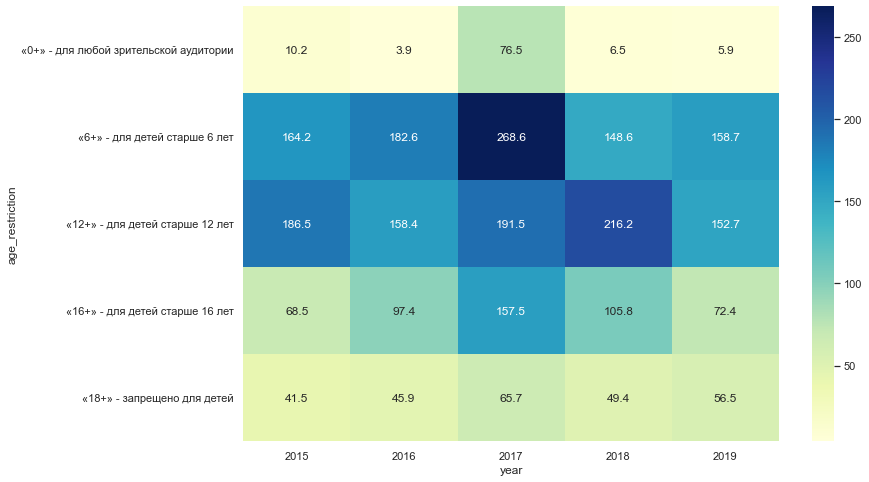

In [56]:
sns.heatmap(age_rest.transpose(), annot=True, fmt='g', cmap="YlGnBu");

Хитмап прекрасно иллюстрирует следующее: самые неприбыльные фильмы - без возрастных ограничений. Вероятно, это в основном детские мультфильмы, имеющие очень узкую аудиторию. То же верно и для категории 18+, которая тоже лимитирована, но с обратной стороны.  
Самые популярные категории и самые доходные.  


## Исследование фильмов, получивших государственную поддержку


In [57]:
gos = drop[drop.financing_source.notna()]
gos.head(3)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,year,main_genre,production_country_list
1060,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"[драма, мелодрама]",365353.6,33.0,2013,драма,[Россия]
1210,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,70.0,2014,0,[Россия]
1255,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"[комедия, фантастика]",19957031.5,61.0,2013,комедия,[Россия]


In [58]:
gos['production_country'].value_counts()

Россия                                        313
Россия, Италия                                  2
Россия, Германия                                2
Россия, Франция, Латвия                         1
Россия-Украина                                  1
Россия, Украина, Польша                         1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия-Словакия-Чехия                           1
Россия, Латвия, Чешская Республика              1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Сербия                                  1
Россия - Грузия                                 1
Россия-Китай                                    1
Россия, Бельгия, Финляндия                      1
Name: production_country, dtype: int64

Очевидно, что господдержку получали только фильмы, в съёмках которых участвовала Россия.

In [59]:
print('В среднем выделенных возвратных средств, млн: ', round(gos.refundable_support.mean()/1_000_000))
print('В среднем выделенных невозвратных средств, млн: ',round(gos.nonrefundable_support.mean()/1_000_000))

В среднем выделенных возвратных средств, млн:  12
В среднем выделенных невозвратных средств, млн:  48


In [60]:
print('Доля возвратых средств:',
      gos['refundable_support'].sum() / (gos['refundable_support'].sum() + gos['nonrefundable_support'].sum()))

Доля возвратых средств: 0.19515732608147468


В среднем, только одна пятая часть денег подразумевает возврат.

In [61]:
round(gos[gos.refundable_support > 0].budget.sum())

20865509752

In [62]:
round(gos[gos.refundable_support > 0].box_office.sum())

25690999771

In [63]:
round(gos[gos.refundable_support > 0].budget.mean())

191426695

In [64]:
round(gos[gos.refundable_support > 0].box_office.mean())

237879628

Для фильмов с возвратной господдержкой прослеживается общая окупаемость. И сумма сборов, и средние сборы выше затрат.

In [65]:
print('Средний рейтинг по источнику финансирования:',gos.groupby('financing_source')['ratings'].mean())

Средний рейтинг по источнику финансирования: financing_source
Министерство культуры               6.118000
Министерство культуры, Фонд кино    6.438095
Фонд кино                           5.803571
Name: ratings, dtype: float64


In [66]:
gos.groupby('financing_source')['refundable_support'].mean()

financing_source
Министерство культуры               0.000000e+00
Министерство культуры, Фонд кино    1.479545e+07
Фонд кино                           2.436458e+07
Name: refundable_support, dtype: float64

Видны две закономерности: МинКульт вообще не требует возврата средств, среднее = 0. А рейтинги фильмов, профинансированных одновременно Фондом кино и МинКультом - выше остальных. Вполне возможно, что оба "спонсора" ведут какой-либо надзор, либо предъявляют схожие, но не идентичные требования, выполнение которых ведёт к улучшению метрик.

In [67]:
gos.groupby('director')['refundable_support'].mean().sort_values(ascending=False
)[gos.groupby('director')['refundable_support'].mean().sort_values()>0]

director
О.Степченко    180000000.0
А.Мизгирев     150000000.0
К.Бронзит      115000000.0
А.Учитель      110000000.0
Ю.Васильев     110000000.0
                  ...     
И.Максимов       5000000.0
Р.Волобуев       5000000.0
К.Худяков        3673440.5
В.Хотиненко      3576559.5
В.Сторожева      3500000.0
Name: refundable_support, Length: 100, dtype: float64

Всего сто режиссёров получали возвратную поддержку, легко увидеть самых поддерживаемых.

In [68]:
gos.groupby('director')['nonrefundable_support'].mean().sort_values(ascending=False
)[gos.groupby('director')['nonrefundable_support'].mean().sort_values()>0]

director
А.Кравчук                                     400000000.0
А.Мегердичев                                  400000000.0
Н.Лебедев                                     392104482.0
А.Мизгирев                                    300000000.0
Д.Козловский                                  260000000.0
                                                 ...     
Е.Константинова (псевдоним Алена Званцева)      5000000.0
Д.Елеонский                                     5000000.0
К.Васильев                                      5000000.0
Н.Степанова при участии С.Иванова               4700000.0
А.Попова                                        3000000.0
Name: nonrefundable_support, Length: 278, dtype: float64

Подобная таблица для невозвратного спонсирования выдаёт целых 278 человек, при этом основные имена отличаются.  
Следовательно, разные люди получают финансы на разных условиях.

In [69]:
gos['refundable_support_mln'] = round(gos['refundable_support'] / 1_000_000, 1)
gos['nonrefundable_support_mln'] = round(gos['nonrefundable_support'] / 1_000_000,1)

C:\Users\gazel\AppData\Local\Temp/ipykernel_37324/940785802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gos['refundable_support_mln'] = round(gos['refundable_support'] / 1_000_000, 1)
C:\Users\gazel\AppData\Local\Temp/ipykernel_37324/940785802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gos['nonrefundable_support_mln'] = round(gos['nonrefundable_support'] / 1_000_000,1)


Text(0, 0.5, 'Поддержка, млн руб')

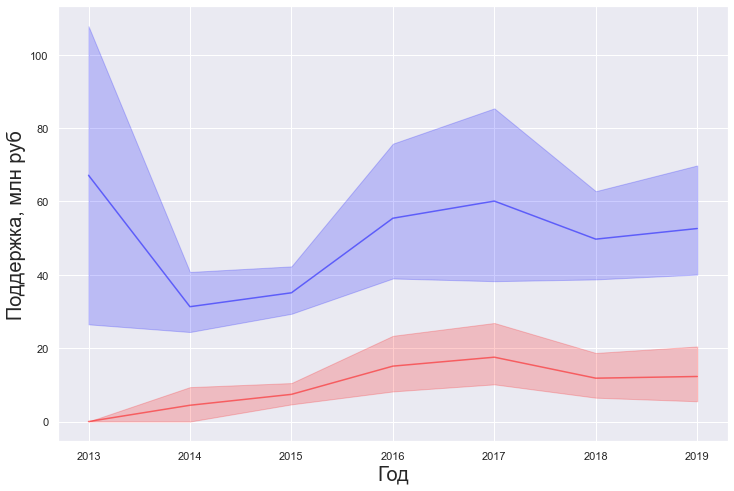

In [70]:
p=sns.lineplot(data=gos, x='year', y='nonrefundable_support_mln', color = 'blue', alpha=.5, legend='full')
p=sns.lineplot(data=gos, x='year', y='refundable_support_mln', color = 'red', alpha=.5, legend='full')
p.set_xlabel("Год", fontsize = 20)
p.set_ylabel("Поддержка, млн руб", fontsize = 20)

Отрисована поддержка по годам, красным - возвратная, синим - невозвратная.

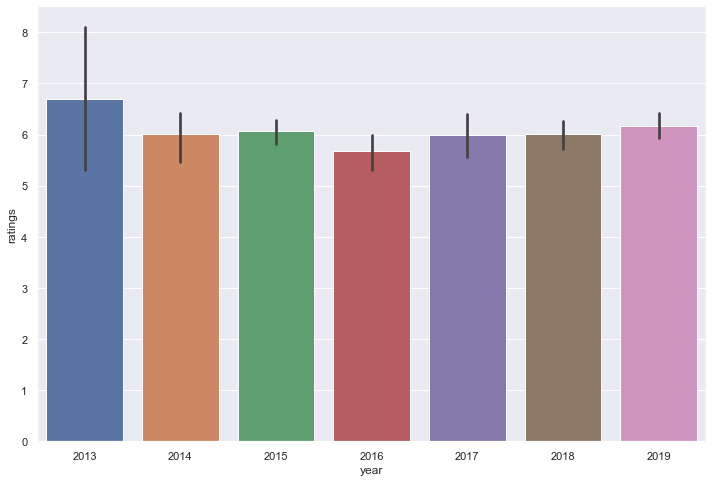

In [71]:
sns.barplot(data=gos, x='year', y='ratings');

При этом средний рейтинг практически не менялся.

## Выводы

Итак, все данные были обработаны для дальнейшего использования, были выброшены некоторые фильмы с пропусками, удалены полные дубликаты. Проблемы с пробелами в названих категорий и именах режиссёров были устранены.  
Настроены категории для стран и возрастных категорий, проанализированы данные о прокате для каждого года.  
Фильмы с государственной поддержкой рассмотрены отдельно, их средний рейтинг оставляет желать лучшего, что, однако, не останавливает поток денежных средств при стагнации качественных метрик. 